In [1]:
from sklearn.datasets import load_digits

In [2]:
digit = load_digits()

In [3]:
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
digit.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels

In [5]:
type(digit)

sklearn.utils.Bunch

In [6]:
dir(digit)

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
X, y = digit['data'], digit['target']

In [8]:
X.shape

(1797, 64)

In [9]:
y.shape

(1797,)

In [10]:
type(X)

numpy.ndarray

In [11]:
type(y)

numpy.ndarray

In [12]:
%matplotlib inline

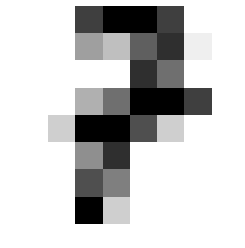

In [13]:
import matplotlib.pyplot as plt
import matplotlib
some_digit = X[1200]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [14]:
y[1200]

7

In [15]:
X_train, X_test, y_train, y_test = X[:1200], X[1200:], y[:1200], y[1200:]

In [16]:
X_train.shape

(1200, 64)

In [17]:
import numpy as np
shuffle_index = np.random.permutation(1200)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [71]:
X_train[1]
y_train[1]

0

In [19]:
#training a binary classifier
#for fun lets create a binary classifier which only know 5 or not 5

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_clf = SGDClassifier(random_state = 42)

In [23]:
sgd_clf.fit(X_train, y_train_5)

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
#sgd_clf.predict([some_digit])

sgd_clf.predict([X_train[29]])

array([ True])

In [27]:
from sklearn.model_selection import StratifiedKFold

In [28]:
from sklearn.base import clone

In [29]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.99
0.88
0.9875


/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they de

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they de

array([0.93548387, 0.945     , 0.94458438])

In [32]:
#let’s look at a very dumb classifier that just
#classifies every single image in the “not-5” class:

In [33]:
from sklearn.base import BaseEstimator

In [34]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [35]:
never_5_clf = Never5Classifier()

In [36]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.92  , 0.8875, 0.885 ])

In [37]:
#as we can see the model is so stupid hahahahahah the lesson is do not use accuracy metrics when you deal with
#skewed data ok

In [38]:
from sklearn.model_selection import cross_val_predict

In [70]:
y_train_predict = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they de

In [43]:
from sklearn.metrics import confusion_matrix



In [44]:
confusion_matrix (y_train_5, y_train_predict)

array([[1028,   49],
       [   8,  115]])

In [45]:
from sklearn.metrics import precision_score, recall_score

In [46]:
precision_score(y_train_5, y_train_predict)

0.7012195121951219

In [47]:
recall_score(y_train_5, y_train_predict)

0.9349593495934959

In [48]:
from sklearn.metrics import f1_score

In [49]:
f1_score(y_train_5, y_train_predict)

0.8013937282229964

In [50]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                            method='decision_function')

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they de

In [51]:
from sklearn.metrics import precision_recall_curve

In [52]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [53]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel("Thresholds")
    plt.legend(loc='upper left')
    plt.ylim([0,1])

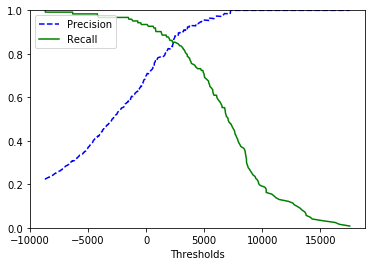

In [54]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [55]:
#the receiver operating characterstics(roc) it plot the true postive rate against the false postive rate

In [56]:
from sklearn.metrics import roc_curve

In [57]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

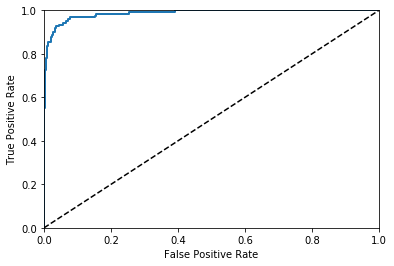

In [59]:
plot_roc_curve(fpr, tpr)
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(y_train_5, y_scores)

0.9861177163303666

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
forest_clf = RandomForestClassifier(random_state=42)

In [86]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [87]:
y_scores_forest = y_probas_forest[:, 1]

In [88]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

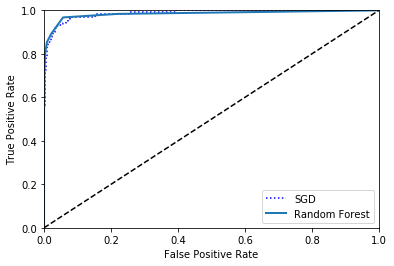

In [89]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [90]:
roc_auc_score(y_train_5, y_scores_forest)

0.9837209653433582

In [91]:
#multiclass classification(multinomial classification)

In [92]:
sgd_clf.fit(X_train, y_train)

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
sgd_clf.predict([some_digit])
sgd_clf.predict([X_train[29]])

array([5])

In [95]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [96]:
some_digit_scores

array([[ -9312.57662194,  -7994.41631563,  -5310.08475909,
         -7103.30992903,  -7137.09838357,  -9856.46688493,
        -12049.29494597,   2551.59490218,  -8646.785943  ,
         -4861.33223241]])

In [97]:
np.argmax(some_digit_scores)

7

In [98]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
sgd_clf.classes_[7]

7

In [100]:
#to force scikit learn to use one vs one classifier for multiclass we can do

In [101]:
from sklearn.multiclass import OneVsOneClassifier

In [102]:
ovso = OneVsOneClassifier(SGDClassifier(random_state=42))

In [103]:
ovso.fit(X_train, y_train)

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they de

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [104]:
ovso.predict(X_test)

array([7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 8, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 6, 4, 0, 5, 3, 6, 9, 6, 5, 9,
       5, 4, 4, 7, 2, 8, 2, 2, 2, 7, 9, 5, 4, 8, 8, 4, 9, 5, 8, 9, 8, 0,
       9, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 1, 3, 4, 5, 6, 7, 8, 9, 0, 9, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 2, 3, 7, 8, 3, 0, 1, 9, 6, 3, 3, 7, 3, 3, 4, 6, 6,
       6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 3, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6,
       3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4,
       4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 9, 2, 3, 4,
       5, 6, 7, 9, 9, 0, 9, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 9, 7, 7, 3, 5, 9, 0,
       0, 2, 2, 7, 9, 2, 0, 9, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 9,
       5, 0, 9, 5, 2, 9, 2, 0, 0, 9, 7, 6, 3, 2, 9,

In [105]:
ovso.score(X_test, y_test)

0.9011725293132329

In [106]:
ovso.predict([some_digit])

array([7])

In [107]:
len(ovso.estimators_)

45

In [108]:
'''
RandomForestClassifier can directly classifiy instances into multiple classes
you can call predict_proba() to get the list of probabilities that the classifier assigned to each instance
for each class
'''

'\nRandomForestClassifier can directly classifiy instances into multiple classes\nyou can call predict_proba() to get the list of probabilities that the classifier assigned to each instance\nfor each class\n'

In [109]:
forest_clf.fit(X_train, y_train)

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [110]:
forest_clf.predict([some_digit])

array([7])

In [111]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0.6, 0.1, 0. ]])

In [112]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they de

array([0.93548387, 0.945     , 0.94458438])

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [115]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they de

array([0.96029777, 0.9425    , 0.9395466 ])

In [116]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they de

In [117]:
conf_mx

array([[116,   0,   0,   0,   1,   0,   2,   0,   0,   0],
       [  0, 117,   0,   0,   0,   0,   1,   0,   0,   3],
       [  0,   1, 110,   1,   0,   0,   0,   2,   3,   0],
       [  0,   0,   0, 113,   0,   2,   0,   2,   2,   2],
       [  0,   0,   0,   0, 117,   0,   0,   2,   0,   1],
       [  0,   1,   0,   0,   1, 117,   0,   0,   1,   3],
       [  0,   2,   0,   0,   0,   1, 116,   0,   1,   0],
       [  0,   0,   0,   0,   2,   0,   0, 113,   1,   2],
       [  0,   8,   1,   2,   0,   1,   2,   0, 104,   1],
       [  0,   0,   0,   1,   1,   2,   1,   0,   3, 114]])

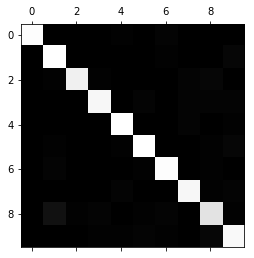

In [118]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

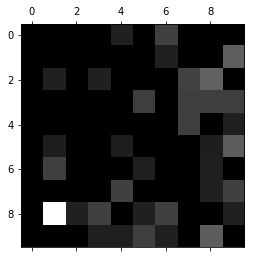

In [119]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

ZeroDivisionError: float division by zero

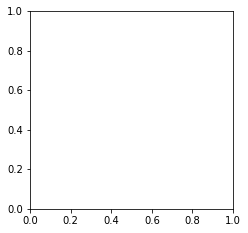

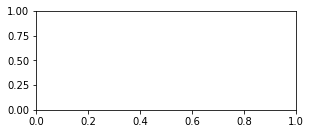

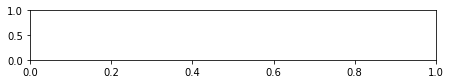

In [120]:
def plot_digits(X, images_per_row = 5):
    plt.matshow(X, cmap = plt.cm.gray)

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25],images_per_row=5)
plt.show()


In [ ]:
#multilabel classification

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
y_train_large = (y_train >= 7)

In [123]:
y_train_odd = (y_train % 2 == 1)

In [124]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [125]:
knn_clf = KNeighborsClassifier()

In [126]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [127]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [128]:
#as you can see the output is a multilabel

In [129]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [130]:
f1_score(y_train, y_train_knn_pred, average='macro')

0.9791915388368923

In [131]:
#multioutput classification
'''
it is a generalization of multilabel classification where each label can be multiclass
'''

'\nit is a generalization of multilabel classification where each label can be multiclass\n'

In [132]:
noisy_image = np.random.randn(8,8)

In [133]:
noisy_image.shape

(8, 8)

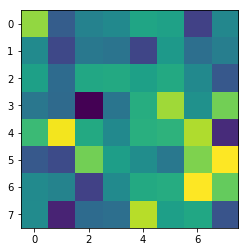

In [134]:
plt.imshow(noisy_image)

In [135]:
noise = np.random.randint(0, 100, (len(X_train), 64))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 64))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


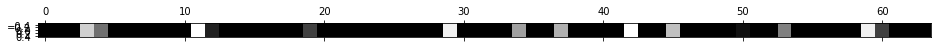

In [149]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[49]])
plot_digits(clean_digit)